In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import sys

In [2]:
df_dist = pd.read_csv(r"C:\Users\jojoa\GitHub\staph\data\dist_matrix.csv") 

In [3]:
df_dist = df_dist.iloc[: , 1:]

Histogram wit repeating pairs.

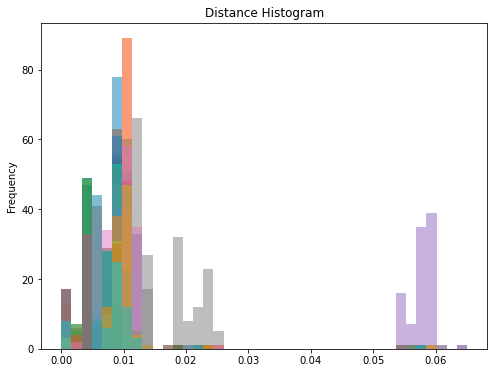

In [4]:
ax=df_dist.plot.hist(bins=40, alpha=0.5, figsize=(8, 6), xlabel='Core Distance',ylabel='Frequency',
                     title='Distance Histogram',legend=False)

Let's take only the lower diagonal of the dataset, as otherwise the pairs repeat as seen relfected along the diagonal of zeros.

In [5]:
tril=np.tril(df_dist)

In [6]:
np.set_printoptions(threshold=sys.maxsize)

In [7]:
dataframe=pd.DataFrame(tril, columns=df_dist.columns) 

In [8]:
dataframe.replace(0.0, np.nan, inplace=True)

In [9]:
dataframe #easier visualization of data after removing duplicate pairs

,18942,1053,36653,35906,24887,40959,19451,16248,17887,44480,...,29295,20565,22234,31939,40447,22779,40560,37248,6454,38985
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.008664,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000044,0.008665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.009705,0.008799,0.009707,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.006318,0.008159,0.006319,0.009809,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.006437,0.008129,0.006438,0.009852,0.003558,0.003224,0.008423,0.003554,0.003889,0.003594,...,0.003625,0.009885,0.003869,0.009745,0.003867,NaN,NaN,NaN,NaN,NaN
96,0.011395,0.010376,0.011396,0.010232,0.011452,0.011375,0.010755,0.011464,0.011300,0.011496,...,0.011462,0.010268,0.011721,0.012152,0.011277,0.011449,NaN,NaN,NaN,NaN
97,0.006454,0.007873,0.006459,0.009630,0.003947,0.003850,0.008153,0.003940,0.000211,0.003925,...,0.003833,0.009662,0.004156,0.009627,0.000189,0.003867,0.011271,NaN,NaN,NaN
98,0.010398,0.007737,0.010400,0.010927,0.009751,0.009712,0.008055,0.009758,0.009659,0.009854,...,0.009776,0.010961,0.010148,0.000084,0.009637,0.009744,0.012150,0.009628,NaN,NaN


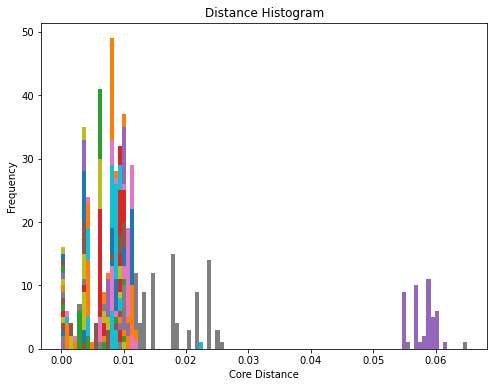

In [10]:
ax=dataframe.plot.hist(bins=100, figsize=(8, 6), xlabel='Core Distance',ylabel='Frequency',
                       title='Distance Histogram',legend=False)
ax.set_xlabel('Core Distance')
ax.set_ylabel('Frequency')
plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\dist_hist_max.eps",format='eps')

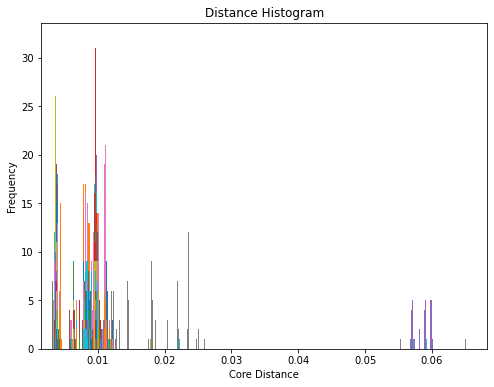

In [21]:
ax=dataframe.plot.hist(bins=500, figsize=(8, 6), xlabel='Core Distance',ylabel='Frequency',
                       title='Distance Histogram',legend=False)
ax.set_xlabel('Core Distance')
ax.set_ylabel('Frequency')
plt.xlim(0.0015)
plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\dist_hist.eps",format='eps')

In [14]:
#figure(figsize=(8, 6), dpi=80)
#hist=plt.hist(tril,bins=40)
#plt.xlabel('Distance')
#plt.ylabel('Counts')
#plt.title('Distance Histogram')
#plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\dist_hist_max")
#plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\dist_hist_max.eps",format='eps')

In [109]:
#figure(figsize=(8, 6), dpi=80)
#hist=plt.hist(tril,bins=40)
#plt.xlabel('Distance')
#plt.ylabel('Counts')
#plt.xlim(0,0.0015)
#plt.title('Distance Histogram')
#plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\dist_hist")
#plt.savefig(r"C:\Users\jojoa\GitHub\staph\images\dist_hist.eps",format='eps')

We can see that the highest peak occurs at a distance of about 0.00145. Thus, we will make this our cutoff for 'closely relatedness.'

In [15]:
for i in range(0,len(df_dist.columns)): #len(df_dist.columns)
    df_dist.loc[df_dist[df_dist.columns[i]]>0.00145,df_dist.columns[i]] = np.nan

In [16]:
df_close=df_dist

In [17]:
df_close

,18942,1053,36653,35906,24887,40959,19451,16248,17887,44480,...,29295,20565,22234,31939,40447,22779,40560,37248,6454,38985
0,0.000000,NaN,0.000044,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000036
1,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.000044,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000037
3,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.000082,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.000158,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
96,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000211,NaN,...,NaN,NaN,NaN,NaN,0.000189,NaN,NaN,0.0,NaN,NaN
98,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.000084,NaN,NaN,NaN,NaN,0.0,NaN


We now have a matrix with the closely related strains, ignoring the cells that have 0.0, as those are strains that are completely identical.

In [18]:
df_close.to_csv(r"C:\Users\jojoa\GitHub\staph\data\closely_related_matrix.csv")

Let's see which strain was most used.

In [19]:
pairs=[]
for i in range(0,len(df_close.columns)):
    name=df_close.columns[i]
    col_1=df_close[name]
    list_1=col_1.map(type)==float
    add=sum(list_1)
    pairs.append({"Number of pairs":add, "Strain ID":name})

In [20]:
(pairs)

[{'Number of pairs': 100, 'Strain ID': '18942'},
 {'Number of pairs': 100, 'Strain ID': '1053'},
 {'Number of pairs': 100, 'Strain ID': '36653'},
 {'Number of pairs': 100, 'Strain ID': '35906'},
 {'Number of pairs': 100, 'Strain ID': '24887'},
 {'Number of pairs': 100, 'Strain ID': '40959'},
 {'Number of pairs': 100, 'Strain ID': '19451'},
 {'Number of pairs': 100, 'Strain ID': '16248'},
 {'Number of pairs': 100, 'Strain ID': '17887'},
 {'Number of pairs': 100, 'Strain ID': '44480'},
 {'Number of pairs': 100, 'Strain ID': '12894'},
 {'Number of pairs': 100, 'Strain ID': '3806'},
 {'Number of pairs': 100, 'Strain ID': '16302'},
 {'Number of pairs': 100, 'Strain ID': '20472'},
 {'Number of pairs': 100, 'Strain ID': '19797'},
 {'Number of pairs': 100, 'Strain ID': '27494'},
 {'Number of pairs': 100, 'Strain ID': '17012'},
 {'Number of pairs': 100, 'Strain ID': '119'},
 {'Number of pairs': 100, 'Strain ID': '32374'},
 {'Number of pairs': 100, 'Strain ID': '41039'},
 {'Number of pairs': 100